<a href="https://colab.research.google.com/github/DDR7707/End-To-End-DNN-Projects/blob/main/MNIST%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Handwritten Digits with CNN
* Importing datasets from `keras.datasets.mnist`.
* Also known as MNIST classification.

## Importing all required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

## Importing the Dataset and setting random seed for reproducability

In [2]:
np.random.seed(42)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

(60000, 28, 28)
(10000, 28, 28)
60000


### Reshapeing the dataset for the data to be compatable with CNN . 
* Reshaping the dataset by adding a single colour channel

In [4]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

### Converting the output labels into dummyvariables for compatability

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Normalizing the input data in the for of array for easy manipulation and training

In [6]:
X_train = X_train/255 
X_test = X_test/255
output_labels = 10

## Creating the model

In [9]:
def leNet_model():
  # create model
  model = Sequential()
  model.add(Conv2D(35, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(20, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(output_labels, activation='softmax'))
  # Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [10]:
model = leNet_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 35)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 35)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 20)        6320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 20)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)              

### Fitting the training dataset along with the validation set to the model

In [11]:
history = model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 32s 18ms/step - loss: 0.6179 - accuracy: 0.7940 - val_loss: 0.0500 - val_accuracy: 0.9833
Epoch 2/10
135/135 [==============================] - 2s 15ms/step - loss: 0.0704 - accuracy: 0.9777 - val_loss: 0.0421 - val_accuracy: 0.9870
Epoch 3/10
135/135 [==============================] - 2s 15ms/step - loss: 0.0516 - accuracy: 0.9834 - val_loss: 0.0357 - val_accuracy: 0.9905
Epoch 4/10
135/135 [==============================] - 2s 15ms/step - loss: 0.0481 - accuracy: 0.9850 - val_loss: 0.0360 - val_accuracy: 0.9893
Epoch 5/10
135/135 [==============================] - 2s 15ms/step - loss: 0.0436 - accuracy: 0.9869 - val_loss: 0.0348 - val_accuracy: 0.9893
Epoch 6/10
135/135 [==============================] - 2s 15ms/step - loss: 0.0436 - accuracy: 0.9869 - val_loss: 0.0319 - val_accuracy: 0.9912
Epoch 7/10
135/135 [==============================] - 2s 15ms/step - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.0376 - val_accuracy: 0.989

### Plotting the Accuracy and loss function on Training vs Validation datasets

Text(0.5, 0, 'epoch')

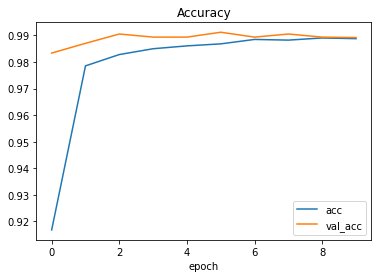

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

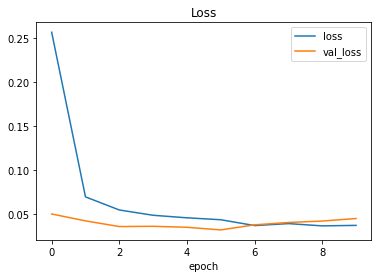

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

### Evaluating our model on the test dataset

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.039013948291540146
Test accuracy: 0.9900000095367432


# Finally got an accuracy of around 99 percent